In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px
import warnings

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80
warnings.filterwarnings('ignore')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv', low_memory=False)
teusaquillo =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'TEUSAQUILLO') & (apartments['coords_modified'] == False)]
teusaquillo = teusaquillo.drop(columns=['precio_arriendo'])
teusaquillo.head()

codigo tipo_propiedad tipo_operacion  precio_venta    area  \
8    5440-M3158129    APARTAMENTO          VENTA   690000000.0  127.00   
12    683-M3368186    APARTAMENTO          VENTA   557000000.0  124.00   
69    411-M4164148    APARTAMENTO          VENTA   430000000.0   53.94   
100   753-M4004071    APARTAMENTO          VENTA   850000000.0  104.00   
138  3491-M2748079    APARTAMENTO          VENTA   580000000.0  176.00   

     habitaciones  banos  administracion  parqueaderos               sector  \
8             3.0    3.0        522000.0           1.0  NICOLAS DE FEDERMAN   
12            4.0    3.0        281000.0           1.0  NICOLAS DE FEDERMAN   
69            1.0    2.0        260000.0           1.0            CHAPINERO   
100           3.0    3.0        350000.0           1.0      SALITRE MODELIA   
138           3.0    2.0        353000.0           1.0            CHAPINERO   

     ...  permite_mascotas gimnasio ascensor  conjunto_cerrado  \
8    ...               0.0      0.0      1.0               1.0   
12   ...               0.0      0.0      1.0               1.0   
69   ...               0.0      1.0      1.0               0.0   
100  ...               0.0      1.0      0.0               1.0   
138  ...               0.0      0.0      0.0               0.0   

     coords_modified    localidad                      barrio  \
8              False  TEUSAQUILLO         NICOLAS DE FEDERMAN   
12             False  TEUSAQUILLO            PABLO VI ETAPA I   
69             False  TEUSAQUILLO                   EL CAMPIN   
100            False  TEUSAQUILLO  CIUDAD SALITRE SURORIENTAL   
138            False  TEUSAQUILLO                    SAN LUIS   

    estacion_tm_cercana distancia_estacion_tm_m is_cerca_estacion_tm  
8                Campín                  637.70                    0  
12       Movistar Arena                  895.35                    0  
69       Movistar Arena                  529.44                    0  
100         Gobernación                  524.35                    0  
138              Campín                  670.77                    0  

[5 rows x 39 columns]

In [4]:
teusaquillo.datetime = pd.to_datetime(teusaquillo.datetime)
teusaquillo.fecha_actualizacion_precio_venta = pd.to_datetime(teusaquillo.fecha_actualizacion_precio_venta)

In [5]:
teusaquillo.shape

(1378, 39)

In [6]:
teusaquillo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 8 to 72187
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   codigo                               1378 non-null   object        
 1   tipo_propiedad                       1378 non-null   object        
 2   tipo_operacion                       1378 non-null   object        
 3   precio_venta                         1378 non-null   float64       
 4   area                                 1378 non-null   float64       
 5   habitaciones                         1378 non-null   float64       
 6   banos                                1378 non-null   float64       
 7   administracion                       1158 non-null   float64       
 8   parqueaderos                         1378 non-null   float64       
 9   sector                               1302 non-null   object        
 10  estrato         

In [7]:
teusaquillo.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'last_view',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'direccion', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [8]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

Eliminamos los precios que son outliers

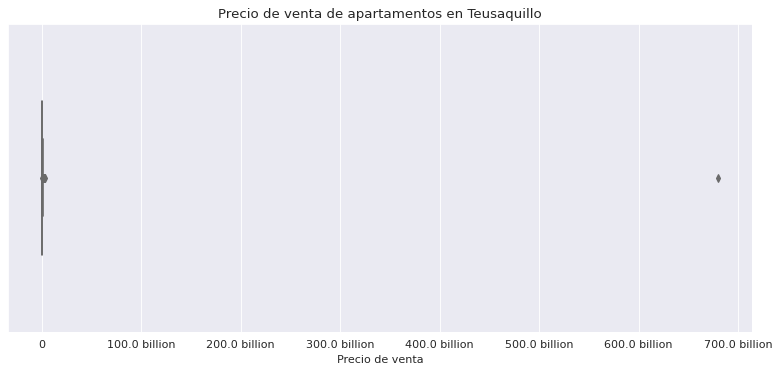

In [9]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    teusaquillo,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Teusaquillo')
plt.xlabel('Precio de venta')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [10]:
Q1 = teusaquillo['precio_venta'].quantile(0.25)
Q3 = teusaquillo['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
if lower < 0:
    lower = Q1 - (0.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = teusaquillo[(teusaquillo['precio_venta'] < lower) | (teusaquillo['precio_venta'] > upper)]
outliers.shape

(79, 39)

In [11]:
teusaquillo = teusaquillo[(teusaquillo['precio_venta'] > lower) & (teusaquillo['precio_venta'] < upper)]
teusaquillo.shape

(1299, 39)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [12]:
# eliminar area igual a 0

teusaquillo = teusaquillo[teusaquillo['area'] > 0]

Eliminamos las areas (m2) que son outliers

In [13]:
Q1 = teusaquillo['area'].quantile(0.25)
Q3 = teusaquillo['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = teusaquillo[(teusaquillo['area'] < lower) | (teusaquillo['area'] > upper)]
outliers.shape

(27, 39)

In [14]:
teusaquillo = teusaquillo[(teusaquillo['area'] > lower) & (teusaquillo['area'] < upper)]
teusaquillo.shape

(1269, 39)

### Analisis

In [15]:
teusaquillo.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

count             mean                std    min    25%   50%    75%  \
area  1,269.0  83.848975571316  32.07266271186746  15.97  60.48  84.0  104.0   

        max  
area  167.0

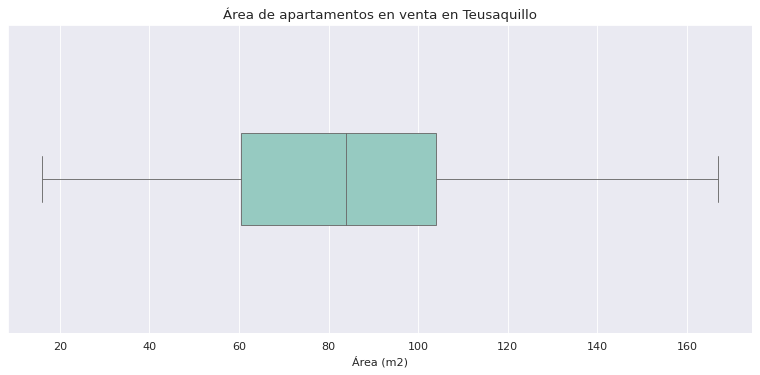

In [16]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=teusaquillo,
    x='area',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Área de apartamentos en venta en Teusaquillo')
plt.xlabel('Área (m2)')
plt.show()

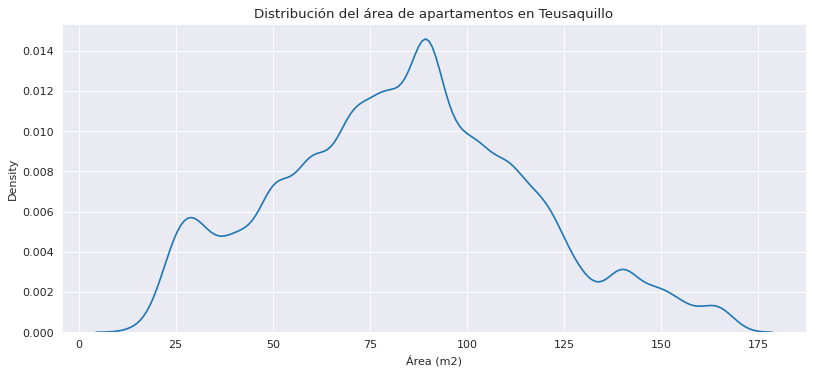

In [17]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Teusaquillo')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

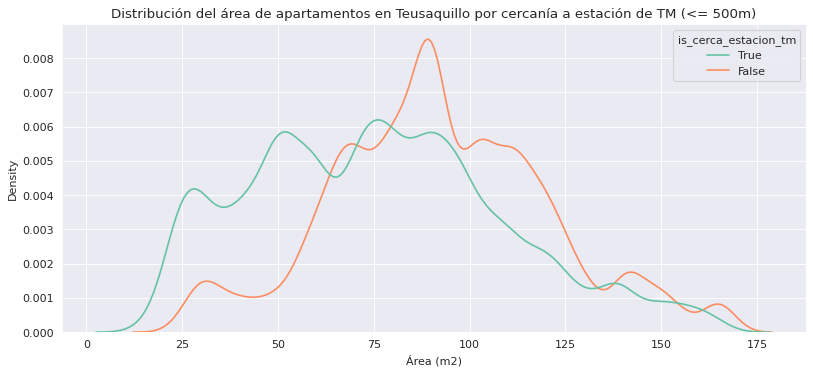

In [19]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Teusaquillo por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2)')
plt.show()

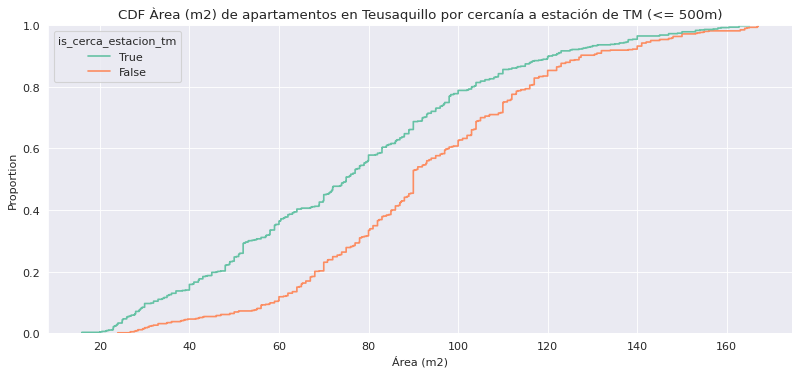

In [20]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('CDF Àrea (m2) de apartamentos en Teusaquillo por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [21]:
teusaquillo.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

count   mean   std   min   25%    50%    75%    max
estrato                                                     
0.0        2.0   96.9  55.3  57.8  77.3   96.9  116.4  136.0
3.0      141.0   56.1  28.4  16.0  33.9   52.0   74.0  167.0
4.0      920.0   84.1  31.1  16.0  62.3   83.0  104.0  167.0
5.0      206.0  101.6  24.8  37.0  84.0  101.5  117.0  166.8

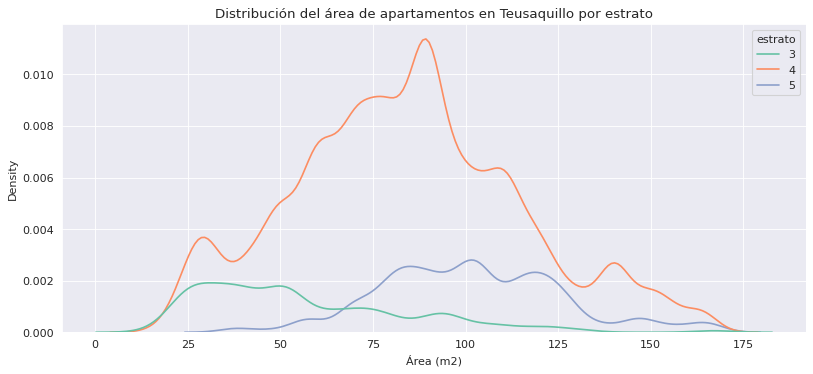

In [23]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Teusaquillo por estrato')
plt.xlabel('Área (m2)')
plt.show()

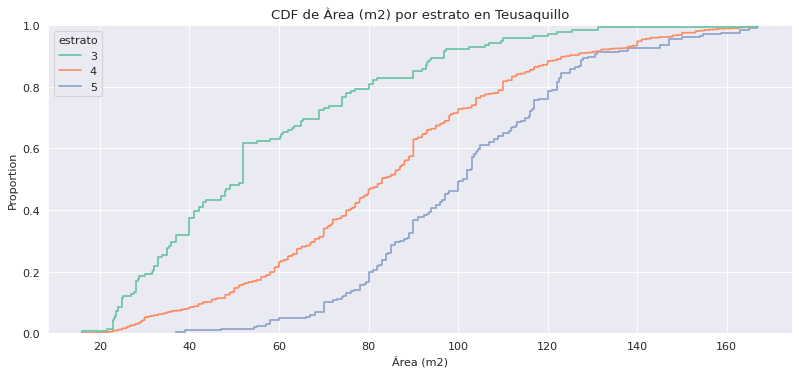

In [25]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5],
)

plt.title('CDF de Àrea (m2) por estrato en Teusaquillo')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [26]:
teusaquillo.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

count  mean   std   min   25%   50%    75%    max
antiguedad                                                           
ENTRE 0 Y 5 ANOS    261.0  61.7  29.3  16.0  38.0  57.8   79.6  150.0
ENTRE 10 Y 20 ANOS  276.0  85.8  24.3  16.0  70.0  87.0   98.5  167.0
ENTRE 5 Y 10 ANOS   131.0  73.6  31.7  23.0  48.0  77.0  101.0  156.0
MAS DE 20 ANOS      549.0  95.3  30.5  24.0  74.0  93.0  115.0  167.0
REMODELADO           52.0  89.2  35.2  23.2  73.2  91.0  117.0  164.5

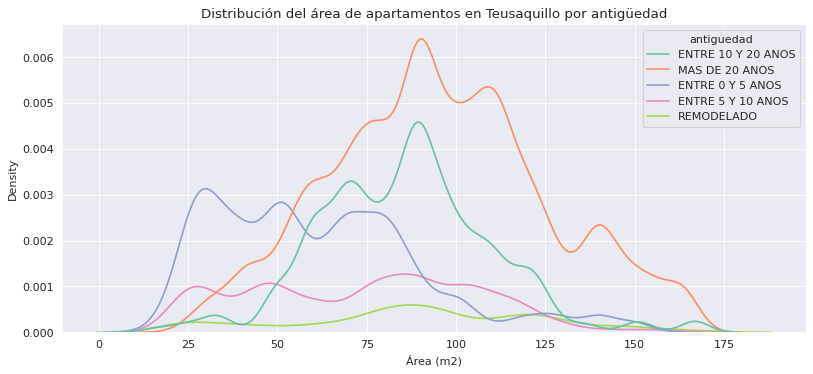

In [27]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Teusaquillo por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

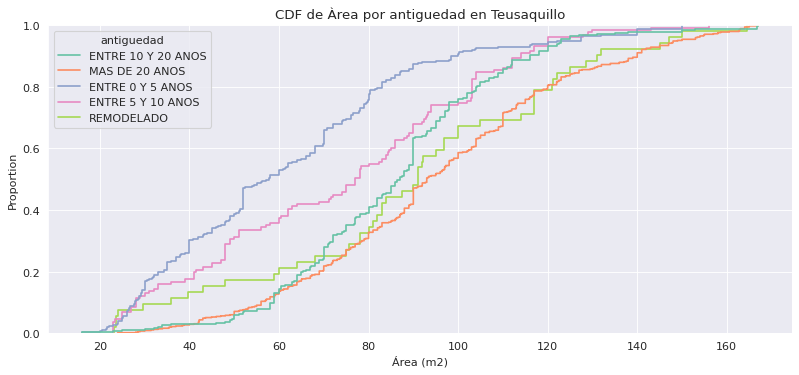

In [28]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de Àrea por antiguedad en Teusaquillo')
plt.xlabel('Área (m2)')
plt.show()

Lo apartamentos mas recientes tienden a tener un Àrea menor que los mas antiguos

### Estacion de TM Cercana

In [29]:
estacion_tm_cercana = teusaquillo[teusaquillo['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

count  mean   std   min   25%   50%  \
estacion_tm_cercana                                                             
Salitre - El Greco                         17.0  95.7  23.8  57.8  86.4  90.0   
AV. El Dorado                              16.0  94.9  29.0  42.0  75.6  94.6   
Campín                                    116.0  93.4  31.3  28.0  74.3  94.5   
Quinta Paredes                             35.0  89.1  32.7  40.7  62.0  87.9   
Calle 26                                   31.0  86.8  48.0  23.8  45.0  80.0   
Movistar Arena                             90.0  85.0  28.4  16.0  59.0  85.9   
Recinto Ferial                             36.0  82.6  21.3  34.0  70.0  77.8   
CAD                                        21.0  81.2  26.3  42.0  61.5  79.0   
U. Nacional                                42.0  80.3  35.6  21.5  60.0  77.0   
Calle 34                                   25.0  79.8  24.8  46.3  60.4  75.0   
Concejo de Bogotá                           6.0  79.3  36.9  22.0  63.8  79.5   
CAN                                        31.0  79.0  11.1  60.0  71.7  80.0   
Gobernación                                12.0  71.2  21.3  52.0  56.8  58.0   
Ciudad Universitaria - Lotería de Bogotá   18.0  67.5  29.3  21.3  44.6  75.0   
Centro Memoria                             17.0  55.1  19.0  35.4  43.0  49.1   
Marly                                      58.0  52.5  21.3  23.2  36.0  52.0   
Calle 45                                   17.0  50.5  20.6  25.0  33.0  51.0   
AV. 39                                      5.0  45.3  25.5  27.0  28.8  32.0   
Calle 63                                    6.0  44.7  15.9  16.0  42.2  46.3   
Calle 57                                   63.0  40.1  21.2  20.0  26.1  32.0   

                                            75%    max  
estacion_tm_cercana                                     
Salitre - El Greco                         97.0  139.0  
AV. El Dorado                             123.0  150.0  
Campín                                    113.7  162.7  
Quinta Paredes                            106.3  165.0  
Calle 26                                  130.6  160.5  
Movistar Arena                            104.0  147.0  
Recinto Ferial                             90.2  131.0  
CAD                                       105.0  129.5  
U. Nacional                               104.0  154.0  
Calle 34                                   90.0  137.5  
Concejo de Bogotá                         102.0  127.0  
CAN                                        86.0   98.0  
Gobernación                                85.2  120.0  
Ciudad Universitaria - Lotería de Bogotá   81.5  119.9  
Centro Memoria                             61.0  100.0  
Marly                                      59.1  102.4  
Calle 45                                   70.0   94.0  
AV. 39                                     51.0   87.5  
Calle 63                                   55.4   60.2  
Calle 57                                   41.0  116.6

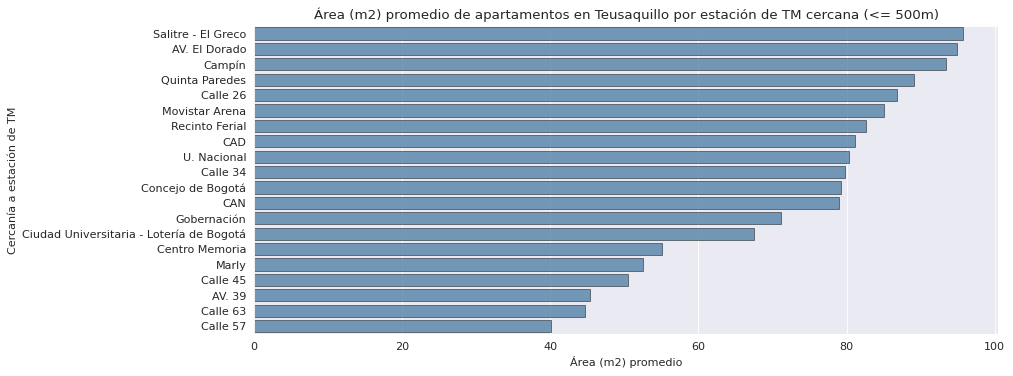

In [30]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

In [31]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='50%', ascending=False)

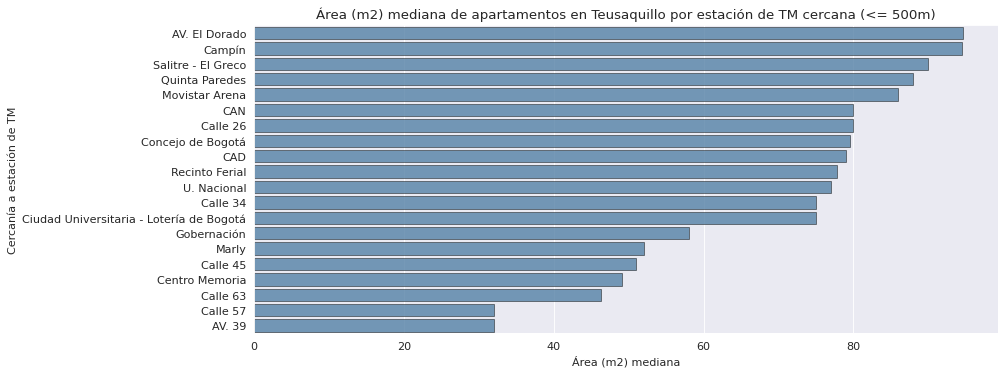

In [33]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='50%',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) mediana de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Área (m2) mediana')
plt.ylabel('Cercanía a estación de TM')
plt.show()

<Figure size 960x400 with 0 Axes>

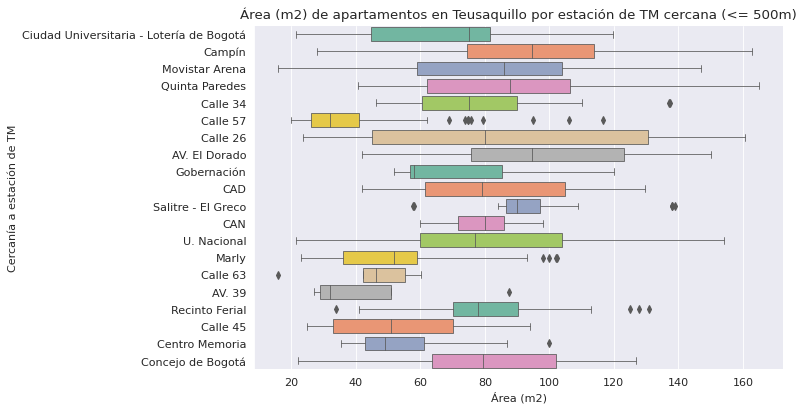

In [34]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

## Precio de venta

In [35]:
fig = px.scatter_mapbox(
    teusaquillo,
    lat='latitud',
    lon='longitud',
    color='precio_venta',
    size='area',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    mapbox_style='open-street-map',
    # mapbox_style='dark',
    title='Precio de venta y área de apartamentos en Teusaquillo',
    hover_name='barrio',
    hover_data=['area', 'precio_venta', 'estrato', 'antiguedad', 'is_cerca_estacion_tm', 'estacion_tm_cercana'],
)

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(
        title='Precio de venta',
        tickformat='s',
    ),
)

fig.show()

In [36]:
teusaquillo.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std            min  \
precio_venta  1.3 thousand  502.9 million  168.5 million  124.0 million   

                        25%            50%            75%          max  
precio_venta  385.0 million  490.0 million  610.0 million  1.0 billion

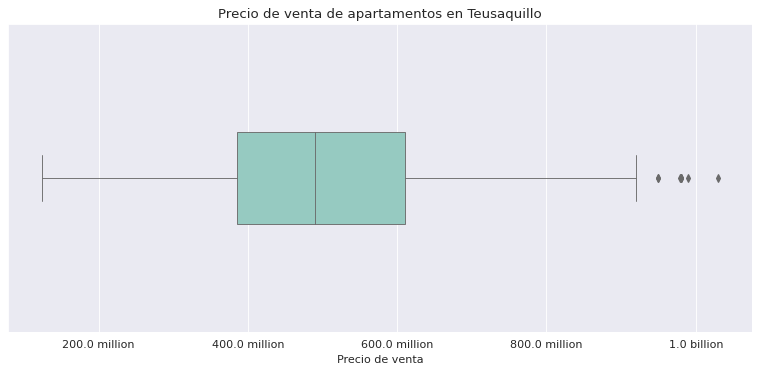

In [37]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    teusaquillo,
    x='precio_venta',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Precio de venta de apartamentos en Teusaquillo')
plt.xlabel('Precio de venta')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

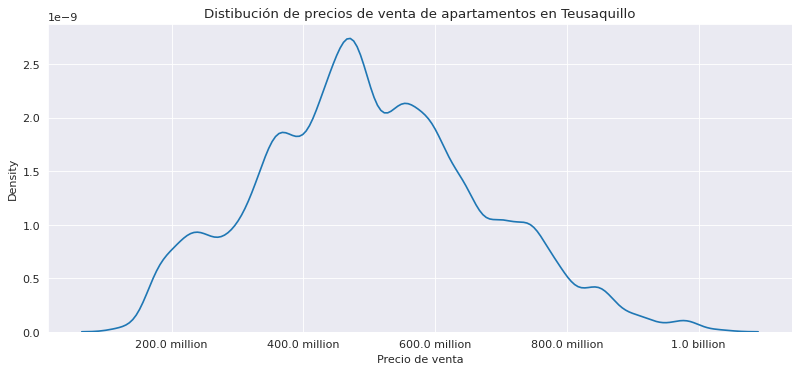

In [38]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Teusaquillo')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Barrios

In [39]:
top_barrios = teusaquillo.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios_mean = top_barrios[top_barrios['count'] > 20].sort_values('mean', ascending=False).head(10)
top_barrios_mean.applymap(lambda x: humanize.intword(x))

count           mean         median            std
barrio                                                                       
PRADOS DEL_SALITRE            29  667.2 million  680.0 million  120.3 million
CIUDAD SALITRE NORORIENTAL    50  649.0 million  690.0 million  149.1 million
CIUDAD SALITRE SURORIENTAL   135  636.4 million  600.0 million  136.9 million
NICOLAS DE FEDERMAN          206  579.7 million  572.5 million  137.5 million
PABLO VI ETAPA I              21  572.8 million  570.0 million   65.5 million
RAFAEL NUNEZ                  54  564.7 million  541.5 million   96.1 million
QUINTA PAREDES                37  547.2 million  489.0 million  119.2 million
ORTEZAL_                      22  533.8 million  500.0 million  168.4 million
EL_RECUERDO                   21  502.6 million  511.0 million  147.9 million
GRAN AMERICA                  30  500.4 million  542.5 million  183.3 million

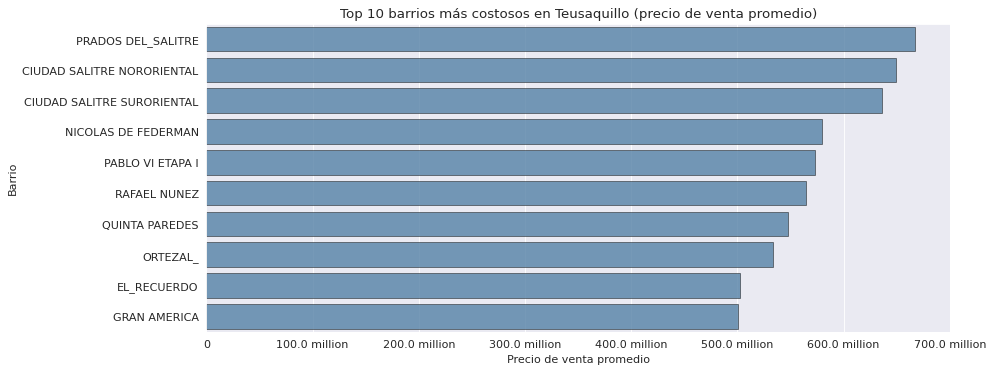

In [40]:
plt.figure(figsize=(12, 5), dpi=80)

sns.barplot(
    top_barrios_mean,
    y=top_barrios_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Teusaquillo (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [41]:
top_barrios_median = top_barrios[top_barrios['count'] > 20].sort_values('median', ascending=False).head(10)
top_barrios_median.applymap(lambda x: humanize.intword(x))

count           mean         median            std
barrio                                                                       
CIUDAD SALITRE NORORIENTAL    50  649.0 million  690.0 million  149.1 million
PRADOS DEL_SALITRE            29  667.2 million  680.0 million  120.3 million
CIUDAD SALITRE SURORIENTAL   135  636.4 million  600.0 million  136.9 million
NICOLAS DE FEDERMAN          206  579.7 million  572.5 million  137.5 million
PABLO VI ETAPA I              21  572.8 million  570.0 million   65.5 million
GRAN AMERICA                  30  500.4 million  542.5 million  183.3 million
RAFAEL NUNEZ                  54  564.7 million  541.5 million   96.1 million
EL_RECUERDO                   21  502.6 million  511.0 million  147.9 million
ORTEZAL_                      22  533.8 million  500.0 million  168.4 million
QUINTA PAREDES                37  547.2 million  489.0 million  119.2 million

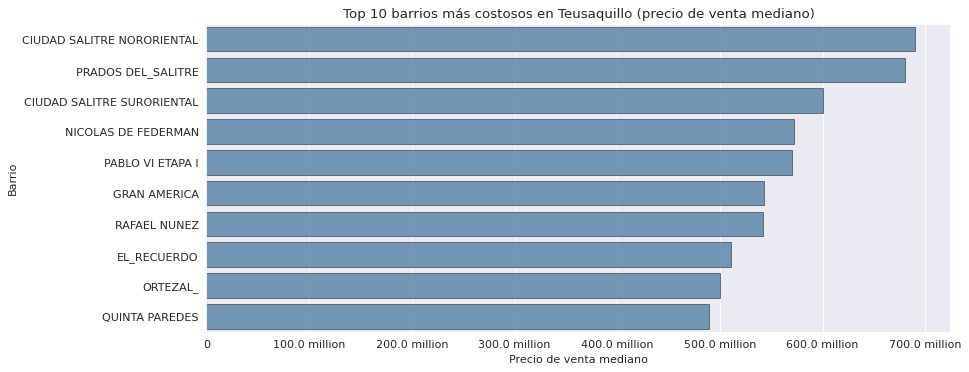

In [42]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_median,
    y=top_barrios_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Teusaquillo (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [43]:
top_barrios_economicos = teusaquillo.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

top_barrios_economicos_mean = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('mean', ascending=True).head(10)
top_barrios_economicos_mean.applymap(lambda x: humanize.intword(x))

count           mean         median            std
barrio                                                                 
CHAPINERO OCCIDENTAL    60  254.0 million  230.0 million   76.5 million
SANTA TERESITA          17  318.3 million  290.0 million  121.1 million
BANCO CENTRAL           14  342.4 million  325.0 million  119.4 million
QUESADA                 50  348.8 million  310.0 million  106.0 million
PALERMO                 14  350.5 million  376.8 million   88.1 million
ALFONSO LOPEZ           32  374.8 million  378.5 million  132.3 million
GALERIAS                23  399.3 million  395.0 million  126.0 million
TEUSAQUILLO             32  419.8 million  390.0 million   91.5 million
ARMENIA                 34  438.2 million  405.0 million  145.7 million
SAN LUIS                72  439.8 million  420.0 million  156.6 million

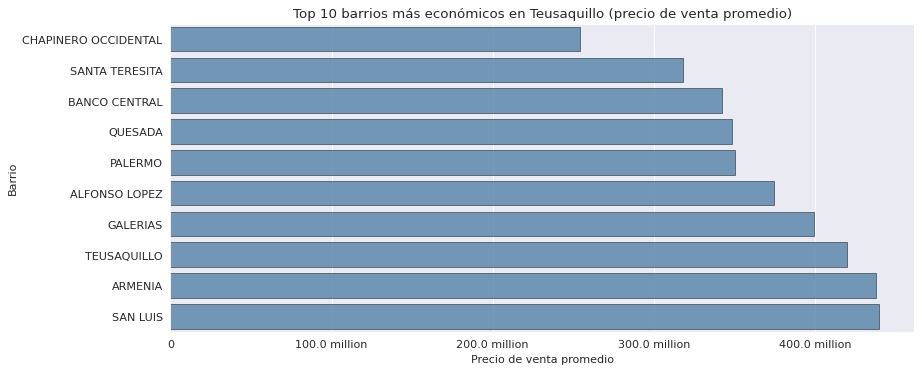

In [44]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_mean,
    y=top_barrios_economicos_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Teusaquillo (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [45]:
top_barrios_economicos_median = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('median', ascending=True).head(10)
top_barrios_economicos_median.applymap(lambda x: humanize.intword(x))

count           mean         median            std
barrio                                                                 
CHAPINERO OCCIDENTAL    60  254.0 million  230.0 million   76.5 million
SANTA TERESITA          17  318.3 million  290.0 million  121.1 million
QUESADA                 50  348.8 million  310.0 million  106.0 million
BANCO CENTRAL           14  342.4 million  325.0 million  119.4 million
PALERMO                 14  350.5 million  376.8 million   88.1 million
ALFONSO LOPEZ           32  374.8 million  378.5 million  132.3 million
TEUSAQUILLO             32  419.8 million  390.0 million   91.5 million
GALERIAS                23  399.3 million  395.0 million  126.0 million
ARMENIA                 34  438.2 million  405.0 million  145.7 million
SAN LUIS                72  439.8 million  420.0 million  156.6 million

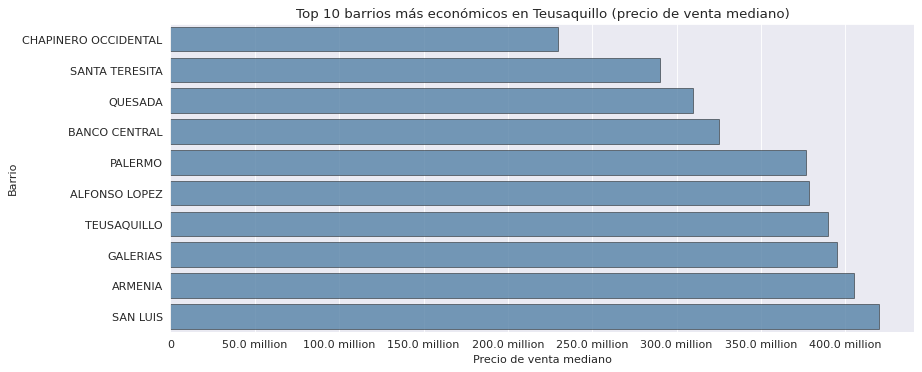

In [46]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_median,
    y=top_barrios_economicos_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Teusaquillo (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Cercania a Transmilenio

In [47]:
teusaquillo.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

count                 mean                   std  \
is_cerca_estacion_tm                                                     
0                     607.0  557,160,235.4184514  158,580,001.24180532   
1                     662.0  453,191,117.1993958   161,933,061.0599109   

                                min            25%            50%  \
is_cerca_estacion_tm                                                
0                     124,000,000.0  450,000,000.0  550,000,000.0   
1                     164,900,000.0  330,000,000.0  450,000,000.0   

                                75%              max  
is_cerca_estacion_tm                                  
0                     650,000,000.0  1,030,000,000.0  
1                     556,736,000.0    980,000,000.0

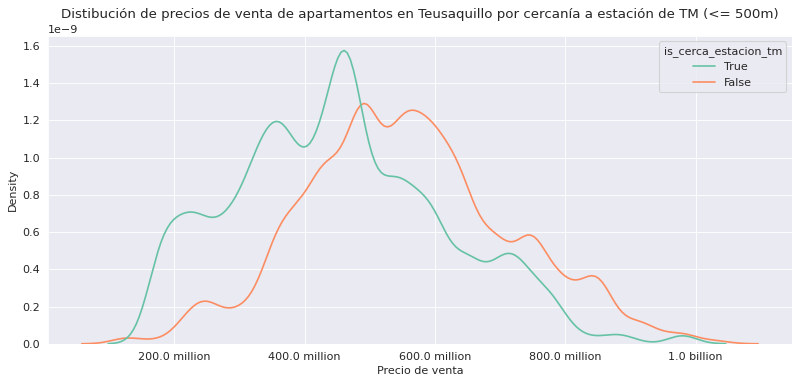

In [48]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Teusaquillo por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

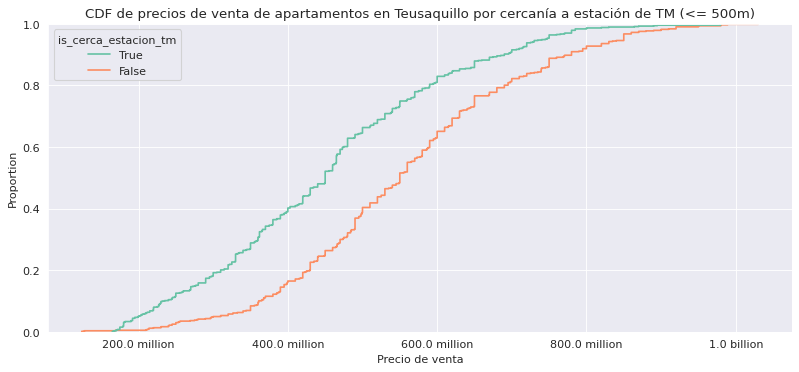

In [49]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Teusaquillo por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [50]:
teusaquillo.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

count           mean            std            min            25%  \
estrato                                                                     
0.0         2  630.0 million   56.6 million  590.0 million  610.0 million   
3.0       141  331.1 million  125.6 million  124.0 million  220.0 million   
4.0       920  501.5 million  154.8 million  127.5 million  390.0 million   
5.0       206  625.8 million  147.5 million  280.0 million  530.0 million   

                   50%            75%            max  
estrato                                               
0.0      630.0 million  650.0 million  670.0 million  
3.0      310.0 million  450.0 million  695.0 million  
4.0      490.0 million  598.0 million  989.0 million  
5.0      620.0 million  750.0 million    1.0 billion

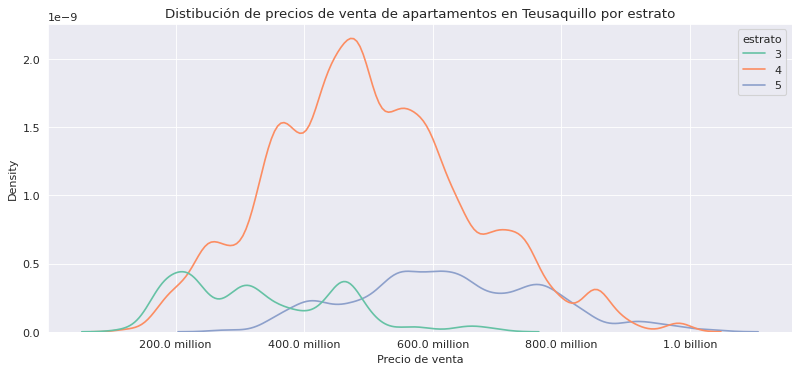

In [51]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Teusaquillo por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

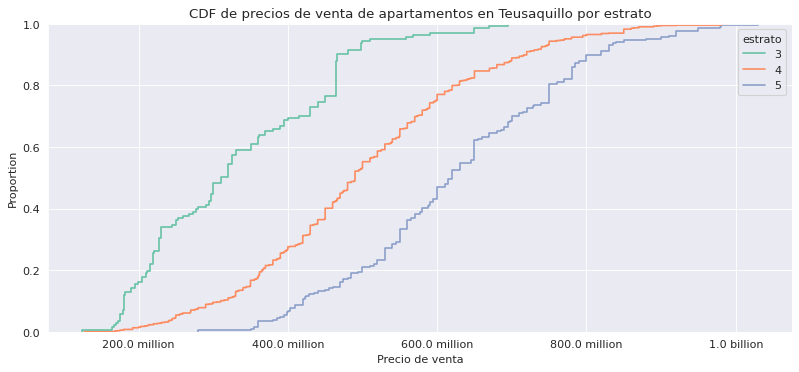

In [52]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Teusaquillo por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Antiguedad del apartamento

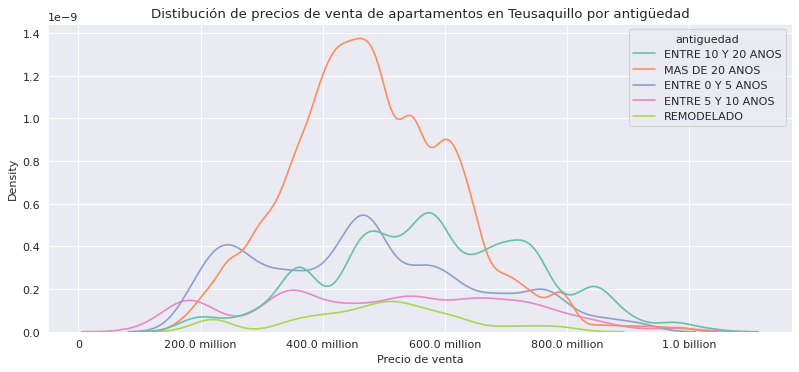

In [53]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Teusaquillo por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

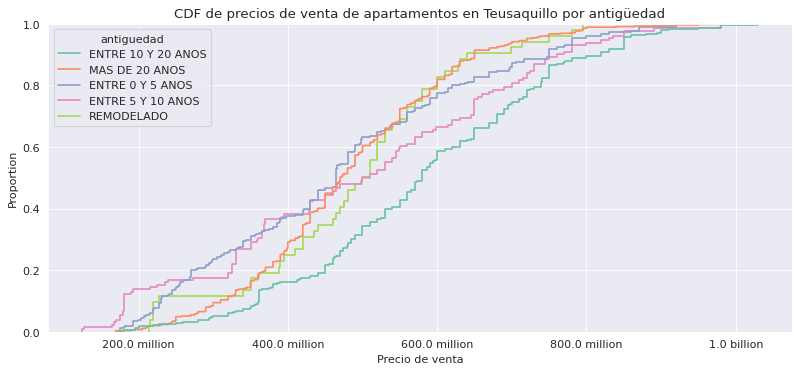

In [54]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Teusaquillo por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [55]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

count           mean            std  \
estacion_tm_cercana                                                            
Salitre - El Greco                          17  662.6 million  122.8 million   
CAN                                         31  661.0 million  140.7 million   
CAD                                         21  570.9 million  124.5 million   
Gobernación                                 12  537.2 million  158.8 million   
Quinta Paredes                              35  524.9 million  158.1 million   
Movistar Arena                              90  511.0 million  136.3 million   
Recinto Ferial                              36  508.4 million  105.0 million   
Campín                                     116  481.6 million  142.0 million   
AV. El Dorado                               16  465.2 million  114.5 million   
Calle 26                                    31  445.2 million  150.7 million   
U. Nacional                                 42  438.1 million  122.9 million   
Ciudad Universitaria - Lotería de Bogotá    18  418.0 million  160.6 million   
Centro Memoria                              17  409.4 million  134.8 million   
Calle 34                                    25  409.0 million   73.5 million   
Concejo de Bogotá                            6  386.5 million  127.8 million   
Marly                                       58  351.8 million  101.9 million   
AV. 39                                       5  294.1 million  108.9 million   
Calle 45                                    17  286.8 million   79.2 million   
Calle 57                                    63  260.0 million   80.2 million   
Calle 63                                     6  246.2 million   84.0 million   

                                                    min            25%  \
estacion_tm_cercana                                                      
Salitre - El Greco                        430.0 million  565.0 million   
CAN                                       420.0 million  545.0 million   
CAD                                       240.0 million  530.0 million   
Gobernación                               412.6 million  449.8 million   
Quinta Paredes                            250.0 million  417.5 million   
Movistar Arena                            240.0 million  385.0 million   
Recinto Ferial                            290.0 million  470.0 million   
Campín                                    255.0 million  360.0 million   
AV. El Dorado                             320.0 million  362.5 million   
Calle 26                                  220.0 million  350.0 million   
U. Nacional                               175.0 million  362.5 million   
Ciudad Universitaria - Lotería de Bogotá  192.0 million  251.8 million   
Centro Memoria                            212.0 million  334.0 million   
Calle 34                                  315.0 million  366.0 million   
Concejo de Bogotá                         175.0 million  348.8 million   
Marly                                     192.0 million  262.0 million   
AV. 39                                    198.9 million  220.7 million   
Calle 45                                  175.0 million  249.0 million   
Calle 57                                  164.9 million  185.5 million   
Calle 63                                  171.9 million  193.8 million   

                                                    50%            75%  \
estacion_tm_cercana                                                      
Salitre - El Greco                        700.0 million  750.0 million   
CAN                                       690.0 million  755.0 million   
CAD                                       549.8 million  670.0 million   
Gobernación                               450.0 million  591.8 million   
Quinta Paredes                            460.0 million  650.0 million   
Movistar Arena                            525.0 million  613.8 million   
Recinto Ferial                            480.0 million  54

In [56]:
estacion_tm_cercana_stats_mean = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)
estacion_tm_cercana_stats_median = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('50%', ascending=False)

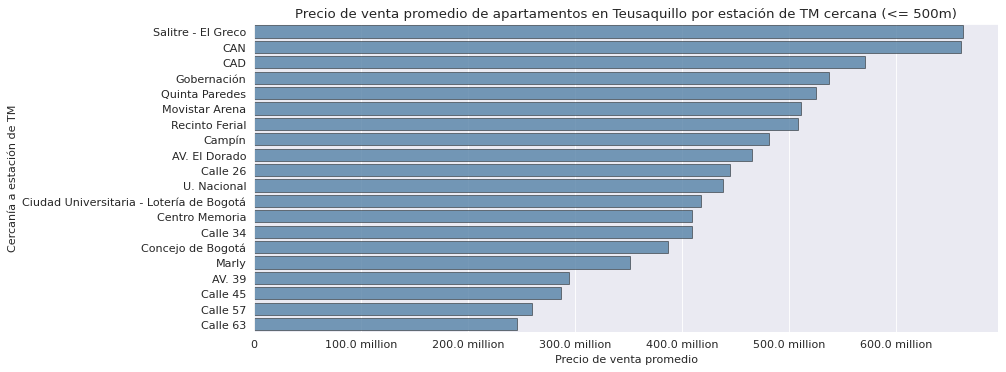

In [57]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_mean,
    y=estacion_tm_cercana_stats_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

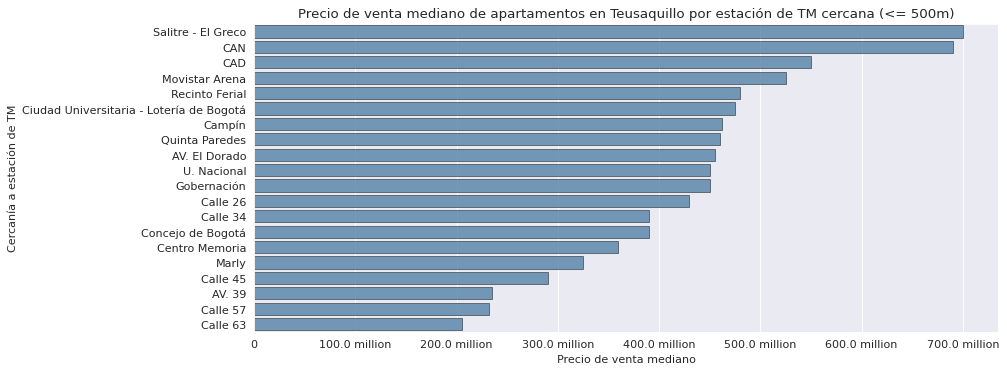

In [58]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_median,
    y=estacion_tm_cercana_stats_median.index,
    x='50%',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta mediano de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

<Figure size 960x400 with 0 Axes>

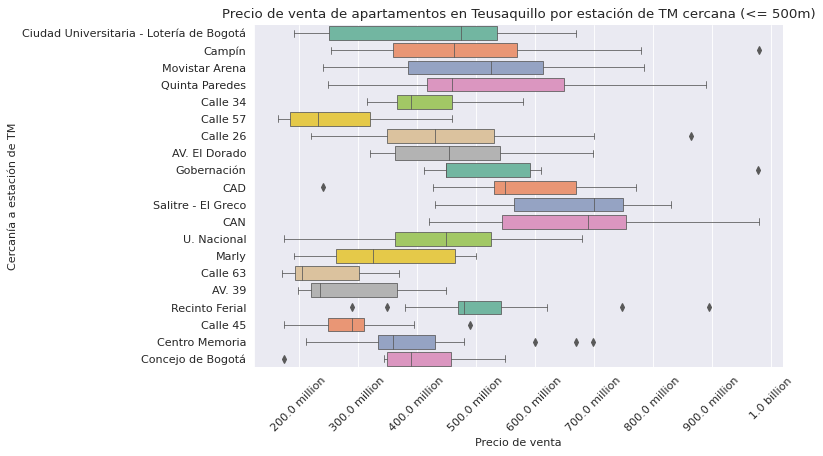

In [61]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='precio_venta',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Precio de venta de apartamentos en Teusaquillo por estación de TM cercana (<= 500m)')
plt.xlabel('Precio de venta')
plt.ylabel('Cercanía a estación de TM')
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Precios Anteriores Vs Actuales

In [62]:
#selcionar todos los datos qut no tenga la columna precio_venta_anterior nula
teusaquillo_ant = teusaquillo[teusaquillo['precio_venta_anterior'].notna()]
teusaquillo_ant = teusaquillo_ant[teusaquillo_ant['fecha_actualizacion_precio_venta'].dt.month == 10]
teusaquillo_ant.shape

(36, 39)

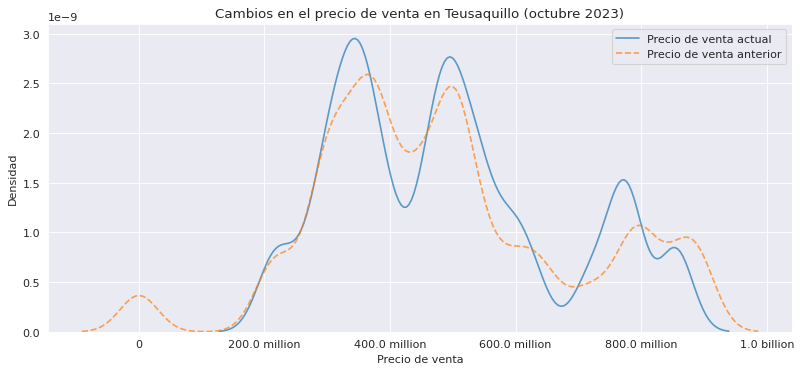

In [63]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    teusaquillo_ant,
    x='precio_venta',
    bw_adjust=.3,
    label='Precio de venta actual',
    alpha=.7,
)

sns.kdeplot(
    teusaquillo_ant,
    x='precio_venta_anterior',
    bw_adjust=.3,
    label='Precio de venta anterior',
    alpha=.7,
    linestyle='--',
)

plt.title('Cambios en el precio de venta en Teusaquillo (octubre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

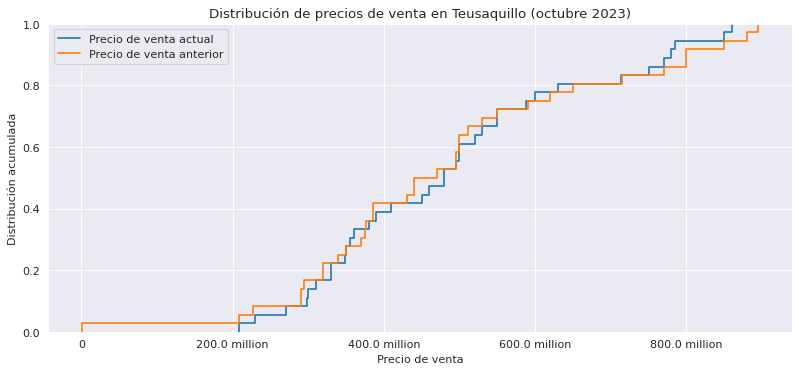

In [64]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    teusaquillo_ant,
    x='precio_venta',
    label='Precio de venta actual',
)

sns.ecdfplot(
    teusaquillo_ant,
    x='precio_venta_anterior',
    label='Precio de venta anterior',
    # alpha=.7
)

plt.title('Distribución de precios de venta en Teusaquillo (octubre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Distribución acumulada')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

In [65]:
teusaquillo_ant.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std            min  \
precio_venta    36  492.0 million  180.7 million  208.0 million   

                        25%            50%            75%            max  
precio_venta  349.8 million  479.5 million  591.0 million  860.0 million

In [66]:
teusaquillo_ant.precio_venta.describe().apply(lambda x: humanize.intword(x))

count               36
mean     492.0 million
std      180.7 million
min      208.0 million
25%      349.8 million
50%      479.5 million
75%      591.0 million
max      860.0 million
Name: precio_venta, dtype: object

In [67]:
teusaquillo_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x)).to_frame().T

count           mean            std             min  \
precio_venta_anterior    36  485.1 million  207.1 million  550.0 thousand   

                                 25%            50%            75%  \
precio_venta_anterior  347.5 million  455.0 million  597.5 million   

                                 max  
precio_venta_anterior  895.0 million

In [68]:
teusaquillo.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x))

count               105
mean      522.2 million
std       179.1 million
min      550.0 thousand
25%       390.0 million
50%       511.0 million
75%       640.0 million
max       895.0 million
Name: precio_venta_anterior, dtype: object

## Antiguedad

In [69]:
teusaquillo.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        549
ENTRE 10 Y 20 ANOS    276
ENTRE 0 Y 5 ANOS      261
ENTRE 5 Y 10 ANOS     131
REMODELADO             52
Name: count, dtype: int64

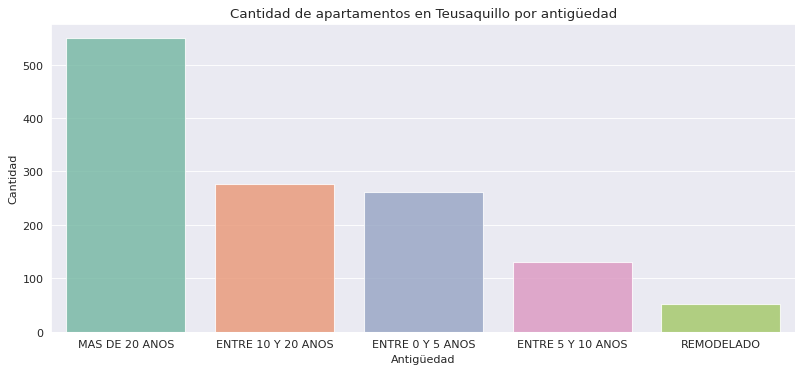

In [71]:
plt.figure(figsize=(12, 5))

sns.countplot(
    teusaquillo,
    x='antiguedad',
    order=teusaquillo.antiguedad.value_counts().index,
    palette='Set2',
    # edgecolor='black',
    # linewidth=.5,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Teusaquillo por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [72]:
teusaquillo.groupby('antiguedad')['barrio'].describe()

count unique                         top freq
antiguedad                                                      
ENTRE 0 Y 5 ANOS     261     28                    SAN LUIS   37
ENTRE 10 Y 20 ANOS   276     31  CIUDAD SALITRE SURORIENTAL   88
ENTRE 5 Y 10 ANOS    131     25         NICOLAS DE FEDERMAN   31
MAS DE 20 ANOS       549     42         NICOLAS DE FEDERMAN   93
REMODELADO            52     18         NICOLAS DE FEDERMAN   13

In [73]:
teusaquillo.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

count  mean   std   min   25%   50%    75%    max
antiguedad                                                           
ENTRE 0 Y 5 ANOS    261.0  61.7  29.3  16.0  38.0  57.8   79.6  150.0
ENTRE 10 Y 20 ANOS  276.0  85.8  24.3  16.0  70.0  87.0   98.5  167.0
ENTRE 5 Y 10 ANOS   131.0  73.6  31.7  23.0  48.0  77.0  101.0  156.0
MAS DE 20 ANOS      549.0  95.3  30.5  24.0  74.0  93.0  115.0  167.0
REMODELADO           52.0  89.2  35.2  23.2  73.2  91.0  117.0  164.5

In [74]:
teusaquillo.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

count unique                 top freq
barrio                                                          
NICOLAS DE FEDERMAN          206      5      MAS DE 20 ANOS   93
CIUDAD SALITRE SURORIENTAL   135      5  ENTRE 10 Y 20 ANOS   88
CAMPIN OCCIDENTAL             82      5      MAS DE 20 ANOS   37
SAN LUIS                      72      5    ENTRE 0 Y 5 ANOS   37
CHAPINERO OCCIDENTAL          60      5    ENTRE 0 Y 5 ANOS   26
RAFAEL NUNEZ                  54      4      MAS DE 20 ANOS   45
CIUDAD SALITRE NORORIENTAL    50      4  ENTRE 10 Y 20 ANOS   26
QUESADA                       50      5    ENTRE 0 Y 5 ANOS   28
BELALCAZAR                    41      5      MAS DE 20 ANOS   28
LA SOLEDAD                    37      5      MAS DE 20 ANOS   29

### Estrato

In [75]:
teusaquillo.barrio.unique()

array(['NICOLAS DE FEDERMAN', 'PABLO VI ETAPA I', 'EL CAMPIN',
       'CIUDAD SALITRE SURORIENTAL', 'GRAN AMERICA', 'PALERMO',
       'CAMPIN OCCIDENTAL', 'SAN LUIS', 'ORTEZAL - QUINTA PAREDES',
       'ORTEZAL_', 'ARMENIA', 'CHAPINERO OCCIDENTAL', 'RAFAEL NUNEZ',
       'LAS AMERICAS', 'GALERIAS', 'CIUDAD SALITRE NORORIENTAL',
       'LA SOLEDAD', 'EL_SALITRE', 'PARQUE SIMON BOLIVAR',
       'ALFONSO LOPEZ', 'QUINTA PAREDES', 'PRADOS DEL_SALITRE',
       'SANTA CLARA', 'QUESADA', 'TEUSAQUILLO', 'LA ESMERALDA',
       'BELALCAZAR', 'CIUDAD UNIVERSITARIA', 'BANCO CENTRAL',
       'GRAN AMERICA - MULTIFAMILIARES FUTURA',
       'CIUDAD SALITRE - URB. INDUSTRIAL LOS CAMBULOS', 'SANTA TERESITA',
       'LA MAGDALENA', 'ESTRELLA', 'PRADOS DE SALITRE II', 'EL_RECUERDO',
       'PABLO VI NORTE', 'S.C. ORTEZAL', 'ORTEZAL CADIZ',
       'CENTRO ADMINISTRATIVO OCCIDENTAL - CAN', 'PABLO VI ETAPA II',
       'PABLO VI - URB. MONTANA QUIRINAL III ETAPA',
       'FLORIDA - PANAMERICANO', 'ACEVEDO TE

In [76]:
teusaquillo.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('estrato', 'mean'),
    median=('estrato', 'median'),
    std=('estrato', 'std'),
).sort_values(by='count', ascending=False).head(10)

count      mean  median       std
barrio                                                       
NICOLAS DE FEDERMAN           206  4.669903     5.0  0.574046
CIUDAD SALITRE SURORIENTAL    135  4.185185     4.0  0.408587
CAMPIN OCCIDENTAL              82  4.085366     4.0  0.281145
SAN LUIS                       72  3.958333     4.0  0.262034
CHAPINERO OCCIDENTAL           60  3.383333     3.0  0.490301
RAFAEL NUNEZ                   54  4.000000     4.0  0.000000
CIUDAD SALITRE NORORIENTAL     50  4.240000     4.0  0.431419
QUESADA                        50  3.160000     3.0  0.421852
BELALCAZAR                     41  4.024390     4.0  0.272746
LA SOLEDAD                     37  3.918919     4.0  0.276725

## Barrios

In [77]:
teusaquillo.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

codigo
barrio                            
NICOLAS DE FEDERMAN            206
CIUDAD SALITRE SURORIENTAL     135
CAMPIN OCCIDENTAL               82
SAN LUIS                        72
CHAPINERO OCCIDENTAL            60
RAFAEL NUNEZ                    54
CIUDAD SALITRE NORORIENTAL      50
QUESADA                         50
BELALCAZAR                      41
LA SOLEDAD                      37

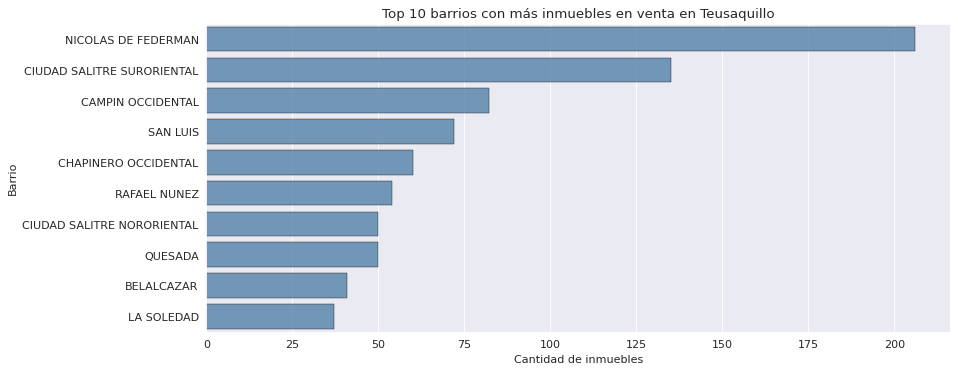

In [78]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=teusaquillo.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=teusaquillo.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Teusaquillo')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()